# Deep Neural Networks course - assignment 1
## Michał Filipiuk 385423

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

from src.batch_norm import Batch_norm_2d
from src.network import Fruit_conv_net, training
from src.data_loader import load_dataset
from src.config_loader import load_config

### Loading configuration and data

In [3]:
config = load_config()
torch.cuda.set_device(config["DEVICE_NUMBER"])

In [4]:
train_class_to_id, train_set_loader = load_dataset(config["DATA_PATH"] + config["TRAIN_PATH"])
test_class_to_id, test_set_loader = load_dataset(config["DATA_PATH"] + config["TEST_PATH"], batch_size=1000)

## Part 1 - network

### Training of the network

In [5]:
network = Fruit_conv_net().cuda()

In [6]:
training(network, train_set_loader, test_set_loader, number_of_epochs = 15)

Training started
Epoch 0: Accuracy of the network:92.15638511661896%
Epoch 1: Accuracy of the network:92.79581024298155%
Epoch 2: Accuracy of the network:93.4230558431277%
Epoch 3: Accuracy of the network:93.7031849461056%
Epoch 4: Accuracy of the network:95.58492174654405%
Epoch 5: Accuracy of the network:95.09165093477864%
Epoch 6: Accuracy of the network:97.88685220144936%
Epoch 7: Accuracy of the network:95.8467815601973%
Epoch 8: Accuracy of the network:97.92948054320686%
Epoch 9: Accuracy of the network:95.65190914073443%
Epoch 10: Accuracy of the network:97.00992631386639%
Epoch 11: Accuracy of the network:97.94166006942329%
Epoch 12: Accuracy of the network:98.08781438402046%
Epoch 13: Accuracy of the network:97.60672309847148%
Epoch 14: Accuracy of the network:94.92722733085684%
Finished Training


## Part 2 - visualisation

In [104]:
train_class_to_id, train_set_loader = load_dataset(config["DATA_PATH"] + config["TRAIN_PATH"], batch_size=1)
images, labels = iter(train_set_loader).next()
images = images.cuda()
labels = labels.cuda()

### Occlusion

### Gradients

In [105]:
images_grad = torch.autograd.Variable(images, requires_grad=True)
optimizer = optim.Adam(network.parameters(), lr=0.0001, weight_decay=1e-2)
criterion = nn.CrossEntropyLoss()
optimizer.zero_grad()
outputs = network(images_grad)
loss = criterion(outputs, labels)
loss.backward()
grads = images_grad.grad

In [106]:
picture = grads.cpu()[0]
R,G,B = grads.cpu()[0]

In [107]:
globalMax = torch.max(picture)
globalMin = torch.min(picture)
globalLength = 2*torch.max(torch.abs(globalMax),torch.abs(globalMin))

In [108]:
globalMax, globalMin, globalLength

(tensor(0.0731), tensor(-0.0594), tensor(0.1462))

In [109]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

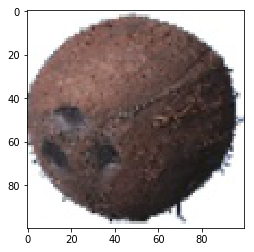

In [110]:
imshow(torchvision.utils.make_grid(images.detach().cpu()))

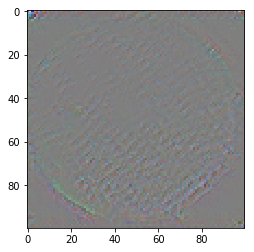

In [111]:
imshow(torchvision.utils.make_grid((picture + globalLength/2)/globalLength))

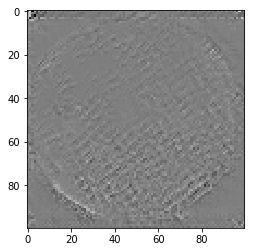

In [112]:
GMax = torch.max(G)
GMin = torch.min(G)
GLength = 2*torch.max(torch.abs(GMax),torch.abs(GMin))
imshow(torchvision.utils.make_grid((G + GLength/2)/GLength))

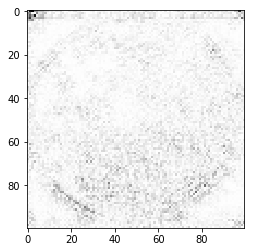

In [116]:
imshow(torchvision.utils.make_grid(1-(torch.abs(G))/GLength*2))

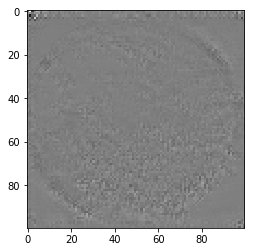

In [113]:
RMax = torch.max(R)
RMin = torch.min(R)
RLength = 2*torch.max(torch.abs(RMax),torch.abs(RMin))
imshow(torchvision.utils.make_grid((R + RLength/2)/RLength))

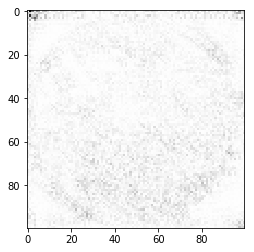

In [117]:
imshow(torchvision.utils.make_grid(1-(torch.abs(R))/RLength*2))

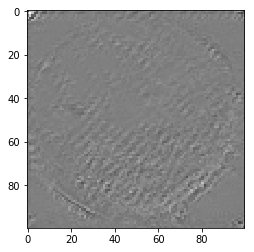

In [114]:
BMax = torch.max(B)
BMin = torch.min(B)
BLength = 2*torch.max(torch.abs(BMax),torch.abs(BMin))
imshow(torchvision.utils.make_grid((B + BLength/2)/BLength))

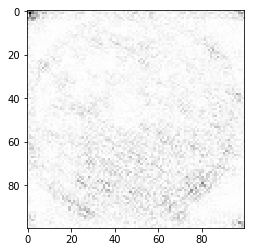

In [118]:
imshow(torchvision.utils.make_grid(1-(torch.abs(B))/BLength*2))